In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [3]:
# Load the dataset
file_path = '/content/Zoo.csv'
zooData = pd.read_csv(file_path)


In [5]:
# 1: Data Analysis with Visualizations
# Display basic information about the dataset
zooData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
# Display the first few rows of the dataset to understand its structure
zooData.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


<ipython-input-7-565e8789ff2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=zooData, palette='viridis')


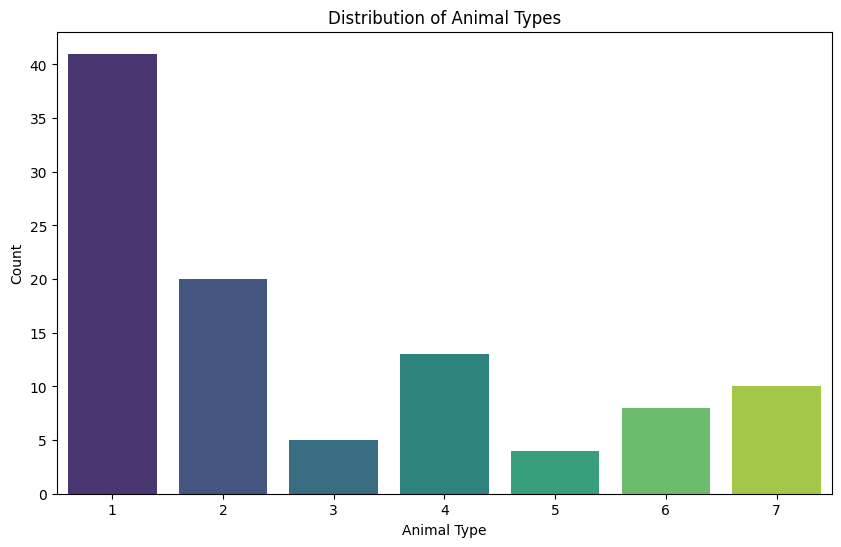

In [7]:
############# data anlysis using visualizations ###############
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=zooData, palette='viridis')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()


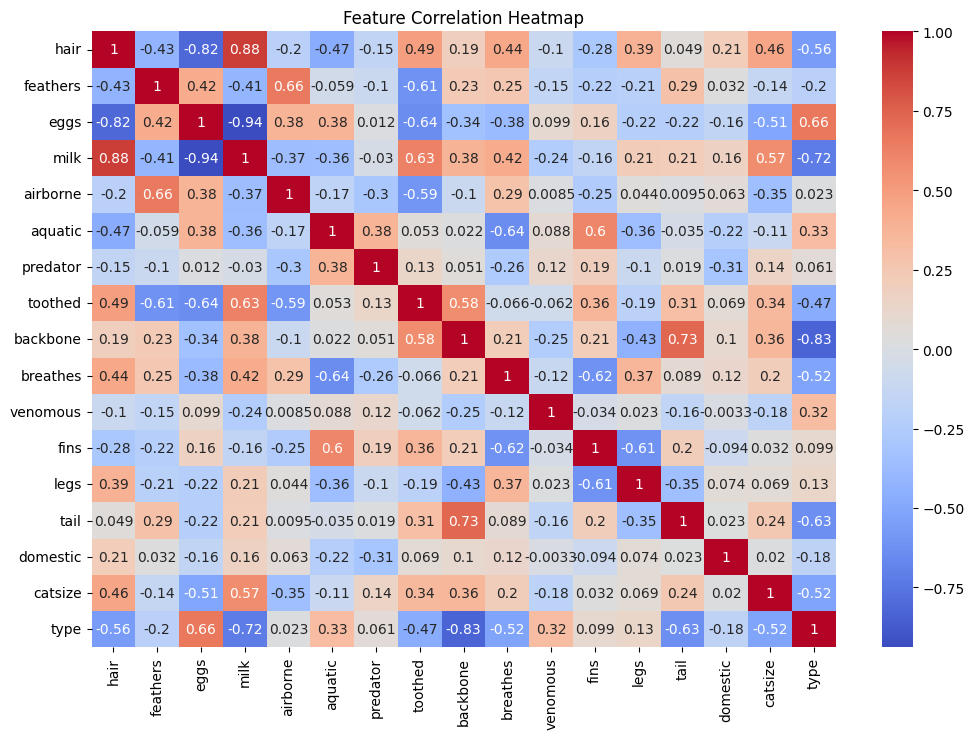

In [9]:
# Heatmap of correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(zooData.drop(columns=['animal name']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [10]:
################## Data Preprocessing ###################
# Check for missing values
missing_values = zooData.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [11]:
# Check for outliers in numerical columns
numerical_features = ['legs']  # 'legs' is the only numerical feature in this dataset


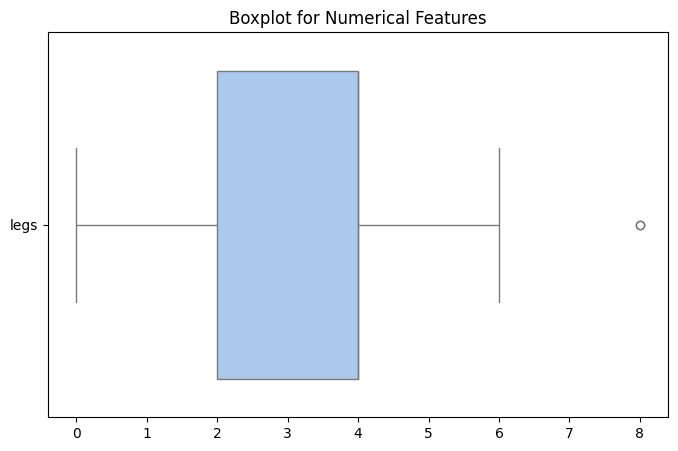

In [12]:
# Boxplot to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=zooData[numerical_features], orient='h', palette='pastel')
plt.title('Boxplot for Numerical Features')
plt.show()


In [13]:
# Statistical summary of numerical features to spot anomalies
zooData[numerical_features].describe()


,legs
count,101.000000
mean,2.841584
std,2.033385
min,0.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,8.000000


In [14]:
#############Split features and target variables(80% training, 20% testing)##########
X = zooData.drop(['type', 'animal name'], axis=1, errors='ignore')
y = zooData['type']


In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
############Implement the K-Nearest Neighbours algorithm ################
# Choosing an appropriate value for K using cross-validation
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy_scores.append(knn.score(X_test_scaled, y_test))


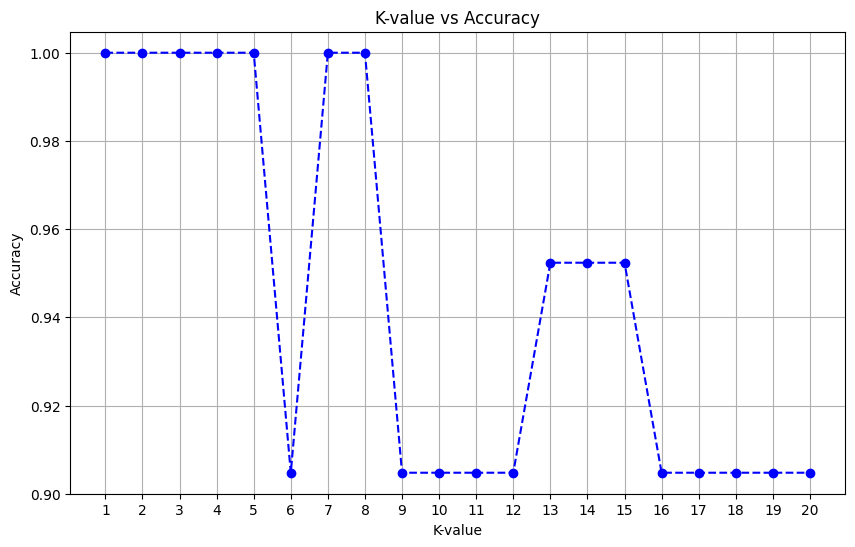

In [18]:
# Plotting accuracy for different values of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('K-value vs Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


In [19]:
######## Final K value(appropriate distance metric and value for K) #########
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]


In [20]:
# Train KNN with the best K
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=1)

In [21]:
########### Evaluate Model Performance #############
y_pred = final_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)


In [22]:
# Display performance metrics
metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1]
})


In [23]:
print("KNN Performance Metrics:")
print(metrics)


KNN Performance Metrics:
      Metric  Value
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0


In [24]:
############# Visualizing boundaries of the classifier. ###########
# For visualizing boundaries, we reduce features to 2 principal components using PCA
from sklearn.decomposition import PCA


In [25]:
# Reduce the features to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)


In [26]:
# Train a new KNN model on the 2D data
knn_2d = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_2d.fit(X_train_2d, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [27]:
# Create a mesh grid for visualization
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


In [28]:
# Predict the class for each grid point
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


<ipython-input-29-36d007d3a64c>:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', marker='x', cmap='coolwarm', label='Test Data')


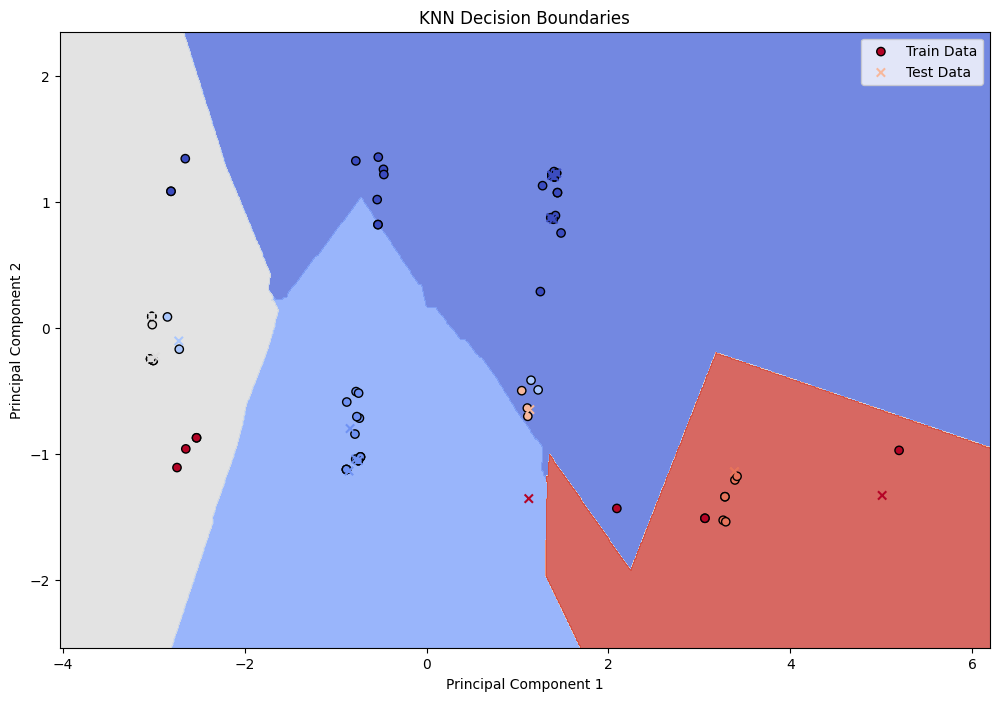

In [29]:
# Plot decision boundaries
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', cmap='coolwarm', label='Train Data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', marker='x', cmap='coolwarm', label='Test Data')
plt.title('KNN Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
